In [1]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lamda = 1 / 0.01
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def check_for_bias(self, X):
        x1 = X

        if self.bias:
            x0 = np.ones(x1.shape[0])
        else:
            x0 = np.zeros(x1.shape[0])
            
        return np.concatenate([x0.reshape(-1,1), x1], axis=1)

    def _hypothetical_function(self, X):
        linear_model = np.dot(X, self.theta)
        
        return 1/( 1 + np.exp(-linear_model) )

    def _gradient_descent(self, X, error):
        self.tmp = np.append(0, np.ones(X.shape[1]-1))
        self.theta -= self.lr * (np.dot(error, X) + self.tmp * self.lamda * self.theta) / len(X)

    def _loss_function(self, y, y_pred):
        return np.mean(-y * np.log(y_pred) - (1-y) * np.log(1-y_pred)) + 0.5 * self.lamda * np.mean(self.theta[1:]**2)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰To学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : of the following form. ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : of the following form. ndarray, shape (n_samples, )
            Correct value of verification data
        """

        self.y_labels = np.unique(y)
        y = np.where(y==self.y_labels[0], 0, 1)

        if (type(y_val) != bool):
            y_val = np.where(y_val==self.y_labels[0], 0, 1)

        X = self.check_for_bias(X)
        
        if (type(X_val) != bool):
            X_val = self.check_for_bias(X_val)


        self.theta = np.random.rand(X.shape[1])

        for i in range(self.iter):
            y_pred = self._hypothetical_function(X)
            error = y_pred - y
            self.loss[i] = self._loss_function(y, y_pred)

            if (type(X_val) != bool):
                y_pred_val = self._hypothetical_function(X_val)
                self.val_loss[i] = self._loss_function(y_val, y_pred_val)

            self._gradient_descent(X, error)
        
            if self.verbose:
                #Output learning process when verbose is set to True
                print(
                    "n_iter", i,
                    "loss", self.loss[i],
                    "theta", self.theta
                )


    def predict(self, X):
        """
        ロジスティック回帰To使いラベルTo推定する。

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        X = self.check_for_bias(X)
        y_pred = self._hypothetical_function(X)
        
        return np.where(y_pred < 0.5, self.y_labels[0], self.y_labels[1])

    def predict_proba(self, X):
        """
        ロジスティック回帰To使い確率To推定する。

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        X = self.check_for_bias(X)
        return self._hypothetical_function(X)
        

## Problem Five: Learning and estimation

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:100, :]
y = iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_test

array([[5.2, 2.7, 3.9, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [5.2, 4.1, 1.5, 0.1],
       [5.3, 3.7, 1.5, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [5.6, 3. , 4.5, 1.5],
       [5.9, 3. , 4.2, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [7. , 3.2, 4.7, 1.4],
       [4.4, 2.9, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.8, 4. , 1.2, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3. , 4.5, 1.5],
       [6.4, 3.2, 4.5, 1.5]])

In [5]:
slr = ScratchLogisticRegression(num_iter=50, lr=0.01, bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

n_iter 0 loss 18.07646890666252 theta [0.14794247 0.53063049 0.36909964 0.69915673 0.4750831 ]
n_iter 1 loss 16.88399246454921 theta [0.14272587 0.49801192 0.34676921 0.6827581  0.46780471]
n_iter 2 loss 15.755258545037503 theta [0.13751941 0.46585132 0.32475089 0.66658116 0.46062058]
n_iter 3 loss 14.688514631198931 theta [0.13232595 0.43415732 0.30305015 0.65062806 0.45353052]
n_iter 4 loss 13.682101489203603 theta [0.1271491  0.40294222 0.28167483 0.63490227 0.44653465]
n_iter 5 loss 12.734454914105662 theta [0.12199338 0.37222269 0.26063558 0.61940886 0.43963345]
n_iter 6 loss 11.844106019338472 theta [0.11686435 0.34202067 0.23994644 0.60415488 0.4328278 ]
n_iter 7 loss 11.00967906734369 theta [0.11176886 0.31236431 0.21962539 0.58914969 0.42611915]
n_iter 8 loss 10.229885521148763 theta [0.10671521 0.28328888 0.19969497 0.57440543 0.41950957]
n_iter 9 loss 9.503512684463889 theta [0.10171333 0.25483768 0.18018274 0.5599374  0.41300186]
n_iter 10 loss 8.829405076726587 theta [0.09

In [6]:
slr.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [7]:
y_test

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

## Problem Six: Plot of learning curve

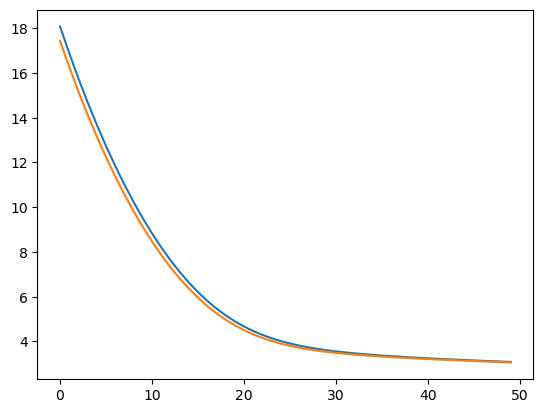

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)
plt.show()

## Problem Seven: Visualization of decision area

We shall retrain the model with two features to align it with the sample code in the text.

In [9]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=6000, lr=0.001,bias=True,verbose=True)
slr.fit(X_train, y_train,X_test,y_test)

n_iter 0 loss 8.587119989153917 theta [0.60739341 0.51446307 0.03756482]
n_iter 1 loss 8.488836726587852 theta [0.60687382 0.51125505 0.03573784]
n_iter 2 loss 8.39148286651839 theta [0.60635493 0.50805465 0.03391532]
n_iter 3 loss 8.295055633441303 theta [0.60583673 0.50486193 0.0320973 ]
n_iter 4 loss 8.199552240540857 theta [0.60531925 0.50167697 0.03028381]
n_iter 5 loss 8.10496988886646 theta [0.60480249 0.49849982 0.0284749 ]
n_iter 6 loss 8.011305766496193 theta [0.60428648 0.49533055 0.0266706 ]
n_iter 7 loss 7.918557047687605 theta [0.60377121 0.49216923 0.02487095]
n_iter 8 loss 7.826720892016159 theta [0.60325672 0.48901591 0.02307599]
n_iter 9 loss 7.735794443501816 theta [0.60274301 0.48587068 0.02128576]
n_iter 10 loss 7.645774829724214 theta [0.6022301  0.48273359 0.0195003 ]
n_iter 11 loss 7.556659160926989 theta [0.601718   0.47960473 0.01771966]
n_iter 12 loss 7.468444529111807 theta [0.60120673 0.47648414 0.01594387]
n_iter 13 loss 7.381128007122717 theta [0.6006963 

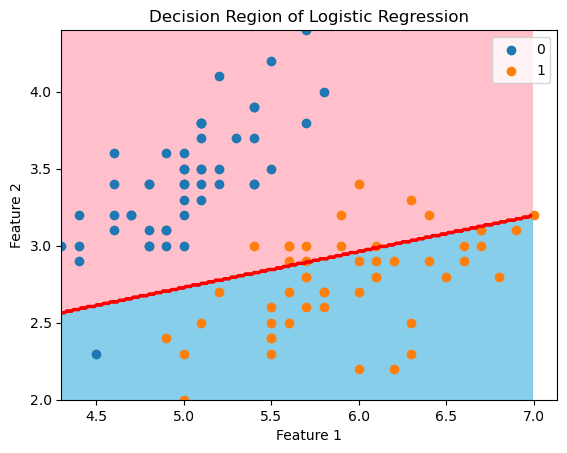

In [10]:
from matplotlib.colors import ListedColormap

def decision_region(X, y, slr):
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]), np.max(X[:, 0]), 0.01),
        np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.01)
    )

    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]

    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('Decision Region of Logistic Regression')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.contourf(mesh_f0, mesh_f1, y_pred, cmap=ListedColormap(["pink", "skyblue"]))
    plt.contour(mesh_f0, mesh_f1, y_pred, colors="red")
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label="0")
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label="1")
    plt.legend()
    plt.show()

decision_region(X, y, slr)

## Problem Eight: (Advance assignment) Saving weights

In [11]:
import pickle

# Save the learned weights using pickle
with open('learned_weights.pkl', 'wb') as f:
    pickle.dump(slr.theta, f)

In [12]:
# Load the learned weights using pickle
with open('learned_weights.pkl', 'rb') as f:
    loaded_weights = pickle.load(f)
loaded_weights

array([ 0.30667924,  0.04585921, -0.19643301])

In [13]:
# Save the learned weights using np.savez
np.savez('learned_weights.npz', slr.theta)

In [14]:
# Load the learned weights using np.load
loaded_data = np.load('learned_weights.npz')
loaded_weights_array = loaded_data['arr_0']
loaded_weights_array

array([ 0.30667924,  0.04585921, -0.19643301])